# SENSOR FUSION PROJECT

In this Project we are going to apply sensor fusion data on a pre-recorded dataset named as 'Data.csv'. The Data is recorded from two different sensors:
1. Accelerometer
2. Gyroscope

## Accelerometer

Accelerometer measures or senses the degree of vibration in a system. A three axis accelerometer measures vibration of a system in three axis (X, Y, Z) or three dimensions. It measures the accelration of the moving body in meters per second sq. (ms^-2)

## Gyroscope

Gyroscope or simply gyrosensor senses the orientation of the object in a space given its intitial pose. It evaluates the orientation of body in terms of angular velocity and with further computation we can actually determine how much body has rotated from its initial orientation.
A three dimensional gyroscope gives angular velocity in X, Y or Z direction.

# Importing Libraries

Following are the libraries we are going to use in this project:
1. Numpy (To deal with data computations, easy to handle vectors and matrices)
2. Matplotlib (To visualize the data)
3. Seaborn (Usually used to visualize large/big data)
4. Math, Copy (Libraries used for handling math equations and computations)
5. IPython.display (This is a library used to display the data in more of a tabular form)

In [1]:
import numpy as np
import seaborn as sns
import control as ct
import csv
import matplotlib.pyplot as plt
import math, copy
from IPython.display import display

# Loading Dataset

In this step we are going to read csv file using numpy and see what features our dataset has and explore how many examples are there in our data set.

In [2]:
file_name = "Data.csv"
data_frame = np.loadtxt(file_name,delimiter =',', dtype = 'str')
display(data_frame)

array([['ax', 'ay', 'az', ..., 'gy', 'gz', 'label'],
       ['1804', '14444', '-3512', ..., '3986', '522', 'walking'],
       ['1792', '14524', '-3456', ..., '3965', '469', 'walking'],
       ...,
       ['4028', '14548', '-864', ..., '-1057', '1363', 'walking'],
       ['3564', '14520', '-1104', ..., '-1693', '1403', 'walking'],
       ['3004', '14480', '-1540', ..., '-2561', '1478', 'walking']],
      dtype='<U7')

# Dataset Attributes

In this step we are going to dive deep into knowing what attributes our dataset contains and how much data is sufficient for our project.

In [3]:
# Lets start with type of our dataframe
print(f"The type of our dataset is: {type(data_frame)}")

# Shape of our dataframe
shape = data_frame.shape
rows = shape[0]
cols = shape[1]
print(f"Shape of our dataset is: {shape}")
print(f"Number of examples in our dataset: {rows}")
print(f"Number of features in our dataset: {cols}")

The type of our dataset is: <class 'numpy.ndarray'>
Shape of our dataset is: (149996, 7)
Number of examples in our dataset: 149996
Number of features in our dataset: 7


In [4]:
# Getting features list from the set
features = list(data_frame[0])
print(f"Features list is: \n{features}")

Features list is: 
['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']


Lets print some of the examples of our training set and get to know more about dataset

In [5]:
# Getting first 5 rows of our data excluding header
first_five = data_frame[1:6]
print(first_five)

[['1804' '14444' '-3512' '-507' '3986' '522' 'walking']
 ['1792' '14524' '-3456' '-428' '3965' '469' 'walking']
 ['2068' '14560' '-3804' '-349' '4005' '438' 'walking']
 ['2032' '14588' '-3608' '-367' '4075' '455' 'walking']
 ['2068' '14796' '-3660' '-483' '4121' '484' 'walking']]


In [6]:
# Lets begin by extracting general details
shp = first_five.shape
m,n = shp
print(f"The shape of extracted data is: {shp}")
print(f"The number of rows we extracted: {m}")
print(f"The number of columns we extracted: {n}")

# Now we want to determine type of data that is stored in our matrix
typ = type(first_five)
print(f"The type of extracted dataset is: {typ}")
# Type of say second row is
typ2 = type(first_five[1])
print(f"The type of second row is: {typ2}")
print(f"Shape of our second row is: {first_five[1].shape}")

The shape of extracted data is: (5, 7)
The number of rows we extracted: 5
The number of columns we extracted: 7
The type of extracted dataset is: <class 'numpy.ndarray'>
The type of second row is: <class 'numpy.ndarray'>
Shape of our second row is: (7,)


This shows us that the individual rows are 1D-vectors that are stacked to make a whole matrix.

In [7]:
# Lets see the type of data stored in the individual row 
# (Is it a string or a float?)

# Lets say we pick accelration value in first row under z-direction
element = first_five[0][2] # -3512
print(f"The element is: {element}")
print(f"The type of stored data point is: {type(element)}")

The element is: -3512
The type of stored data point is: <class 'numpy.str_'>


### Conclusion:

Following are the attributes of our dataset:
1. The total examples present in our dataset are: 149996 (including header)
2. The total columns/features of our dataset are: 7
3. The columns (0-2) represent data gathered from accelerometer (ax, ay, az)
4. The columns (3-5) represent data gathered from gyroscope (gx, gy, gz)
5. The data stored in each row is of type numpy string.
6. The last column represents that data is gathered when the person was walking.

# Data Analysis

In order to perform data analysis we need small sized data, so that it would be easier to perform computations and visualization.

### Data Cleaning
For this project we are going to use only 1000 examples to perform our analysis.

In [8]:
# Lets start!

# Excluding header
dataframe = data_frame[1:1001] # 1001 doesn't includes
print(f"Our NEW DATASET is: \n{dataframe}")
shape = dataframe.shape
print(f"The shape of new dataset is: {shape}")
print(f"The total examples in our data are: {shape[0]}")
print(f"The number of columns in our data are: {shape[1]}")

Our NEW DATASET is: 
[['1804' '14444' '-3512' ... '3986' '522' 'walking']
 ['1792' '14524' '-3456' ... '3965' '469' 'walking']
 ['2068' '14560' '-3804' ... '4005' '438' 'walking']
 ...
 ['4180' '22416' '-632' ... '10073' '-621' 'walking']
 ['3896' '22688' '-1256' ... '10984' '152' 'walking']
 ['2828' '20296' '-1484' ... '11049' '431' 'walking']]
The shape of new dataset is: (1000, 7)
The total examples in our data are: 1000
The number of columns in our data are: 7


Also we don't want last column in our dataset. As it contains only labels.

In [9]:
# Removing last column:
Data = dataframe[:,:6]
print(Data)

[['1804' '14444' '-3512' '-507' '3986' '522']
 ['1792' '14524' '-3456' '-428' '3965' '469']
 ['2068' '14560' '-3804' '-349' '4005' '438']
 ...
 ['4180' '22416' '-632' '-371' '10073' '-621']
 ['3896' '22688' '-1256' '-1521' '10984' '152']
 ['2828' '20296' '-1484' '-1815' '11049' '431']]


Now in our data each element is basically a string and we can't do computations with string objects. Hence converting our data values to int seems good idea!

In [10]:
# Converting type
Data = Data.astype(int)
print(Data)
# Attributes
print(f"Shape of Data: {Data.shape}")
print(f"Rows of Data: {Data.shape[0]}")
print(f"Columns of Data: {Data.shape[1]}")

[[ 1804 14444 -3512  -507  3986   522]
 [ 1792 14524 -3456  -428  3965   469]
 [ 2068 14560 -3804  -349  4005   438]
 ...
 [ 4180 22416  -632  -371 10073  -621]
 [ 3896 22688 -1256 -1521 10984   152]
 [ 2828 20296 -1484 -1815 11049   431]]
Shape of Data: (1000, 6)
Rows of Data: 1000
Columns of Data: 6


### Data Splitting
Now since we have cleaned our data and our data looks ready for computations so now for the sake of ease in computations we are going to split our data into two parts:
1. Accelerometer Readings i.e Columns: 0,1,2 (in numpy format)
2. Gyroscope Readings i.e Columns: 3,4,5 (in numpy format)

In [11]:
# Now we are going to split our data into two matrices 
# Accelerometer Data
accel_data = Data[:,0:3]
print(f"Acelerometer data: \n{accel_data}")
shape_accel = accel_data.shape
print(f"Accelerometer data is of shape: {shape_accel}")
print(f"Rows are: {shape_accel[0]}")
print(f"Columns are: {shape_accel[1]}")

# Gyroscope data
gyro_data = Data[:, 3:6]
print(f"Gyroscope data: \n{gyro_data}")
shape_gyro = gyro_data.shape
print(f"Gyroscope data is of shape: {shape_gyro}")
print(f"Rows are: {shape_gyro[0]}")
print(f"Columns are: {shape_gyro[1]}")

Acelerometer data: 
[[ 1804 14444 -3512]
 [ 1792 14524 -3456]
 [ 2068 14560 -3804]
 ...
 [ 4180 22416  -632]
 [ 3896 22688 -1256]
 [ 2828 20296 -1484]]
Accelerometer data is of shape: (1000, 3)
Rows are: 1000
Columns are: 3
Gyroscope data: 
[[ -507  3986   522]
 [ -428  3965   469]
 [ -349  4005   438]
 ...
 [ -371 10073  -621]
 [-1521 10984   152]
 [-1815 11049   431]]
Gyroscope data is of shape: (1000, 3)
Rows are: 1000
Columns are: 3


### Conclusion
Following are the conclusions made in this section:
1. There are no null entries present in any row of our data. Because if there would then we probably would have gotten error while calculating shape of matrix.
2. Data set is splitted into two: Accelerometer & Gyroscope readings
3. Number of rows in each dataset are: 1000
4. Number of columns in each dataset are: 3 (X,Y,Z)
5. Each element in matrix is of type 'int'

# Data Visualization

So far we have been playing with data and determining general attributes and predicting what our data contains. Now in order to see how our data looks like actually, we are going to use tools like matplotlib or seaborn for this visualization process.

### X-Axis Generation
In order to plot the data we need x-axis. For this purpose we are going to need minimum and maximum of each dataset in order to set range for x-axis

In [12]:
# Printing ranges of matrices for x axis generation for data plotting
max_range_accel = np.max(accel_data)
min_range_accel = np.min(accel_data)
print(f"Accelerometer data \nMax Range = {max_range_accel} \nMin Range = {min_range_accel}")
max_range_gyro = np.max(gyro_data)
min_range_gyro = np.min(gyro_data)
print(f"Gyroscope data \nMax Range = {max_range_gyro} \nMin Range = {min_range_gyro}")

Accelerometer data 
Max Range = 25188 
Min Range = -9704
Gyroscope data 
Max Range = 11049 
Min Range = -6494


### Accelerometer Data Visualization

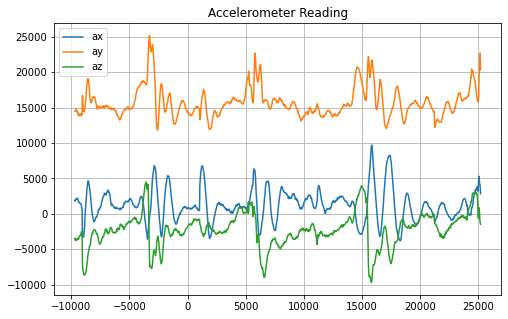

In [13]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(min_range_accel, max_range_accel, 1000)
plt.figure(figsize=(8,5))
plt.plot(xaxis_accel, accel_data[:,0], label='ax')
plt.plot(xaxis_accel, accel_data[:,1], label='ay')
plt.plot(xaxis_accel, accel_data[:,2], label='az')
plt.legend()
plt.title("Accelerometer Reading")
plt.grid()

### Gyroscope Data Visualization

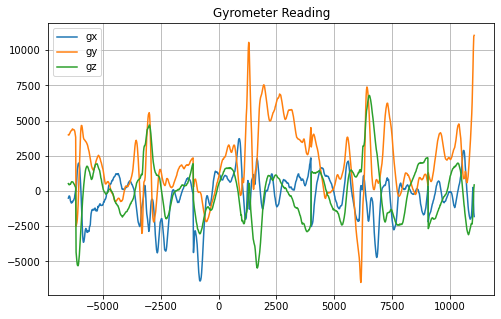

In [14]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(min_range_gyro, max_range_gyro, 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_gyro, gyro_data[:,0], label='gx')
plt.plot(xaxis_gyro, gyro_data[:,1], label='gy')
plt.plot(xaxis_gyro, gyro_data[:,2], label='gz')
plt.legend()
plt.title("Gyrometer Reading")
plt.grid()

# Statistical Analysis

So far we got to know more about our data and how our data looks like but in order to see how our data actually means and how it would help to generate meaningful conclusions about our project is the real question.

So now we are going to perform statistical analysis which includes computing mean of our data both column wise and row wise. This would give a glimpse about how our data variates from the average line.

In [15]:
# We are going to compute mean for that we are going to define function
# that accepts two matrices as parameters and gives two dictionaries

def give_mean(mat_A, mat_B):
    # Declaring necessary empty lists to append mean values
    col_A_mean = [] # Col wise mean for matrix A
    col_B_mean = [] # Col wise mean for matrix B
    row_A_mean = [] # Row wise mean for matrix A
    row_B_mean = [] # Row wise mean for matrix B
    # Declaring shape variables, though both matrices have same shape
    shape_A = mat_A.shape
    shape_B = mat_B.shape
    # Computing col wise mean
    for i in range(shape_A[1]):
        col_wise_A = np.mean(mat_A[:,i])
        col_wise_B = np.mean(mat_B[:,i])
        col_A_mean.append(col_wise_A)
        col_B_mean.append(col_wise_B)
    # Computing row wise mean
    for i in range(shape_A[0]):
        get_row_A = mat_A[i]
        get_row_B = mat_B[i]
        row_wise_A = np.mean(get_row_A)
        row_wise_B = np.mean(get_row_B)
        row_A_mean.append(row_wise_A)
        row_B_mean.append(row_wise_B)
        
    my_dic_A = {"Column_wise_mean":col_A_mean, "Row_wise_mean":np.array(row_A_mean)}
    my_dic_B = {"Column_wise_mean":col_B_mean, "Row_wise_mean":np.array(row_B_mean)}
    
    return my_dic_A, my_dic_B

In [16]:
# Lets see how it works for our sensors
accel_dic, gyro_dic = give_mean(accel_data, gyro_data)
print(accel_dic.keys())
print(gyro_dic.keys())

# Accelerometer
ax_mean, ay_mean, az_mean = accel_dic["Column_wise_mean"][0], accel_dic["Column_wise_mean"][1], accel_dic["Column_wise_mean"][2]
print(f"Accelerometer X-axis mean: {ax_mean}")
print(f"Accelerometer Y-axis mean: {ay_mean}")
print(f"Accelerometer Z-axis mean: {az_mean}")
# Gyroscope
gx_mean, gy_mean, gz_mean = gyro_dic["Column_wise_mean"][0], gyro_dic["Column_wise_mean"][1], gyro_dic["Column_wise_mean"][2]
print(f"Gyroscope X-axis mean: {gx_mean}")
print(f"Gyroscope Y-axis mean: {gy_mean}")
print(f"Gyroscope Z-axis mean: {gz_mean}")

dict_keys(['Column_wise_mean', 'Row_wise_mean'])
dict_keys(['Column_wise_mean', 'Row_wise_mean'])
Accelerometer X-axis mean: 1240.06
Accelerometer Y-axis mean: 15748.72
Accelerometer Z-axis mean: -2261.904
Gyroscope X-axis mean: -375.376
Gyroscope Y-axis mean: 2021.175
Gyroscope Z-axis mean: -69.397


Now as we have computer column wise mean successfully and assigned corresponding variables to each of them, so now lets see what is the shape of our means computer row wise.

We can also print the array of 1000 values but for now we don't need that, so just narrow it down to see did we get mean of all 1000 rows.

In [17]:
# Accelerometer
mean_accel = accel_dic["Row_wise_mean"]
print(f"The type of object we have is: {type(mean_accel)}")
a_shape = mean_accel.shape
print(f"The number of means computed horizontally (ax, ay, az): {a_shape[0]}")

# Gyroscope
mean_gyro = gyro_dic["Row_wise_mean"]
print(f"The type of object we have is: {type(mean_gyro)}")
g_shape = mean_gyro.shape
print(f"The number of means computed horizontally (gx, gy, gz): {g_shape[0]}")

The type of object we have is: <class 'numpy.ndarray'>
The number of means computed horizontally (ax, ay, az): 1000
The type of object we have is: <class 'numpy.ndarray'>
The number of means computed horizontally (gx, gy, gz): 1000


So now we have got all the required information, lets see how it looks visually!

### Accelerometer Mean value Plot

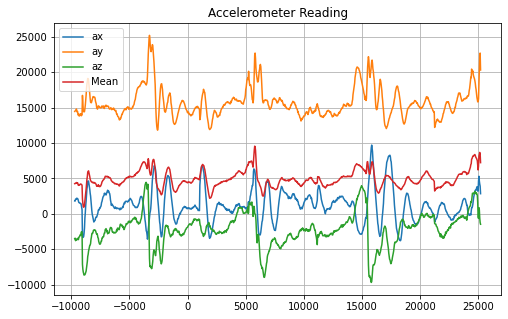

In [18]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(min_range_accel, max_range_accel, 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_accel, accel_data[:,0], label='ax')
plt.plot(xaxis_accel, accel_data[:,1], label='ay')
plt.plot(xaxis_accel, accel_data[:,2], label='az')
plt.plot(xaxis_accel, mean_accel, label='Mean')
plt.legend()
plt.title("Accelerometer Reading")
plt.grid()

### Gyroscope Mean Value Plot

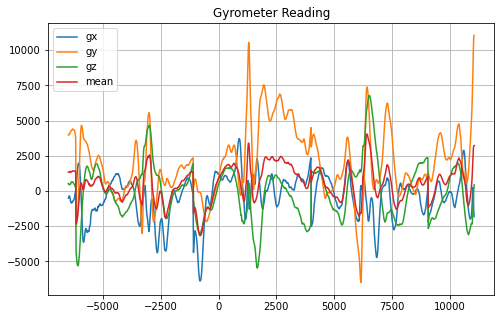

In [19]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(min_range_gyro, max_range_gyro, 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_gyro, gyro_data[:,0], label='gx')
plt.plot(xaxis_gyro, gyro_data[:,1], label='gy')
plt.plot(xaxis_gyro, gyro_data[:,2], label='gz')
plt.plot(xaxis_gyro, mean_gyro, label='mean')
plt.legend()
plt.title("Gyrometer Reading")
plt.grid()

### Conclusion:

From above computations we got to know that:
1. Mean Accelration value in x-direction is: 1240.06 units/sec^2
2. Mean Accelration value in y-direction is: 15748.72 units/sec^2
3. Mean Accelration value in z-direction: -2261.904 units/sec^2
4. Mean Angular velocity in x-direction: -375.376 units/s
5. Mean Angular velocity in y-direction: 2021.175 units/s
6. Mean Angular velocity in z-dircetion: -69.397 units/s

Actually these are the callibration offsets for Accelerometer and Gyroscope:
1. Callibration offsets for accelerometer [ax:1240.06, ay:15748.72, az:-2261.904]
2. Callibration offsets for gyroscope [gx:-375.376, gy:2021.175, gz:-69.397]

# Data Calibration and Scaling

In order to work with data we first have to get rid of such large quantities in thousand. We can normalize data also but since the data doesn't contains time frame hence we are going to scale down our data.

For that purpose we are assuming:
1. Accelerometer is collecting data in mm/s^2 Hence we are going to divide whole data with 1000.
2. Gyroscope is collecting data in deg/sec Hence we are going to multiply whole data with pi/180

After that we are going to callibrate our data by applying offsets.

In [20]:
# Lets start by scaling Accelerometer data
accel = accel_data/1000
print(f"Printing first [ax, ay, az] values: {accel[0]}")
print(f"Shape of Accelerometer data is: {accel.shape}")
print(f"No. of examples are: {accel.shape[0]}")
print(f"No. of features are: {accel.shape[1]}")

# Maximum and Minimum values
max_accel = np.max(accel)
min_accel = np.min(accel)
print(f"Maximum value of accelration in whole set: {max_accel}")
print(f"Minimum value of accelration in whole set: {min_accel}")


Printing first [ax, ay, az] values: [ 1.804 14.444 -3.512]
Shape of Accelerometer data is: (1000, 3)
No. of examples are: 1000
No. of features are: 3
Maximum value of accelration in whole set: 25.188
Minimum value of accelration in whole set: -9.704


In [21]:
# Now for gyroscope
gyro = gyro_data * (math.pi/180)
print(f"Printing first [gx, gy, gz] values: {gyro[0]}")
print(f"Shape of Gyroscope data is: {gyro.shape}")
print(f"No. of examples are: {gyro.shape[0]}")
print(f"No. of features are: {gyro.shape[1]}")

# Maximum and Minimum values
max_gyro = np.max(gyro)
min_gyro = np.min(gyro)
print(f"Maximum value of gyrocsope in whole set: {max_gyro}")
print(f"Minimum value of gyroscope in whole set: {min_gyro}")

Printing first [gx, gy, gz] values: [-8.84881931 69.56882398  9.1106187 ]
Shape of Gyroscope data is: (1000, 3)
No. of examples are: 1000
No. of features are: 3
Maximum value of gyrocsope in whole set: 192.84142905285347
Minimum value of gyroscope in whole set: -113.34168162451176


Okay now lets generate mean values and see how it looks like in scaled down mode.

In [22]:
accel_dic, gyro_dic = give_mean(accel, gyro)
print(accel_dic.keys())
print(gyro_dic.keys())

# Accelerometer
# print(type(accel_dic["Column_wise_mean"]))
ax_mean, ay_mean, az_mean = accel_dic["Column_wise_mean"][0], accel_dic["Column_wise_mean"][1], accel_dic["Column_wise_mean"][2]
print(f"Accelerometer X-axis mean: {ax_mean}")
print(f"Accelerometer Y-axis mean: {ay_mean}")
print(f"Accelerometer Z-axis mean: {az_mean}")
# Gyroscope
gx_mean, gy_mean, gz_mean = gyro_dic["Column_wise_mean"][0], gyro_dic["Column_wise_mean"][1], gyro_dic["Column_wise_mean"][2]
print(f"Gyroscope X-axis mean: {gx_mean}")
print(f"Gyroscope Y-axis mean: {gy_mean}")
print(f"Gyroscope Z-axis mean: {gz_mean}")

dict_keys(['Column_wise_mean', 'Row_wise_mean'])
dict_keys(['Column_wise_mean', 'Row_wise_mean'])
Accelerometer X-axis mean: 1.24006
Accelerometer Y-axis mean: 15.748719999999999
Accelerometer Z-axis mean: -2.261904
Gyroscope X-axis mean: -6.551547132966234
Gyroscope Y-axis mean: 35.27615850899639
Gyroscope Z-axis mean: -1.2112061410065045


In [23]:
# Accelerometer
accel_mean_sc = accel_dic["Row_wise_mean"]

# Gyroscope
gyro_mean_sc = gyro_dic["Row_wise_mean"]

### Plotting Scaled Values Plot

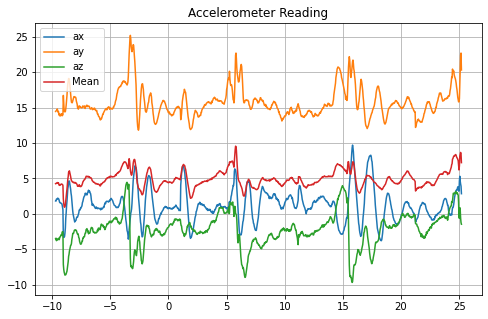

In [24]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(min_accel, max_accel, 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_accel, accel[:,0], label='ax')
plt.plot(xaxis_accel, accel[:,1], label='ay')
plt.plot(xaxis_accel, accel[:,2], label='az')
plt.plot(xaxis_accel, accel_mean_sc, label='Mean')
plt.legend()
plt.title("Accelerometer Reading")
plt.grid()

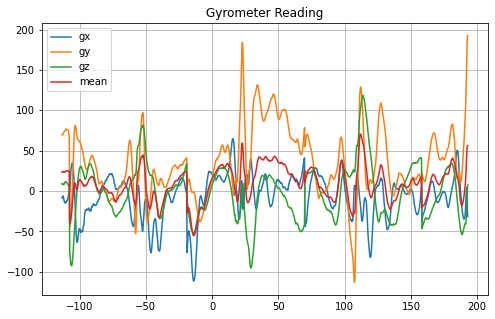

In [25]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(min_gyro, max_gyro, 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_gyro, gyro[:,0], label='gx')
plt.plot(xaxis_gyro, gyro[:,1], label='gy')
plt.plot(xaxis_gyro, gyro[:,2], label='gz')
plt.plot(xaxis_gyro, gyro_mean_sc, label='mean')
plt.legend()
plt.title("Gyrometer Reading")
plt.grid()

### Data Calibration

In [26]:
# Okay so far we have successfully scaled down our data and now next step in sensor fusion is calibrating our data
# Lets apply offsets to our data that we computed column wise

def get_calibrated_data(X,Y, X_off, Y_off):
    # Accelration Callibration
    accel_off_x = X[:,0] - X_off[0]
    accel_off_y = X[:,1] - X_off[1]
    accel_off_z = X[:,2] - X_off[2] 
    
    # Accelration calibrated data
    accel_cal1 = np.hstack((accel_off_x.reshape(X.shape[0], 1), accel_off_y.reshape(X.shape[0], 1)))
    accel_cal = np.hstack((accel_cal1, accel_off_z.reshape(X.shape[0], 1)))
    
    # Gyroscope Callibration
    gyro_off_x = Y[:,0] - Y_off[0]
    gyro_off_y = Y[:,1] - Y_off[1]
    gyro_off_z = Y[:,2] - Y_off[2] 
    
    # Accelration calibrated data
    gyro_cal1 = np.hstack((gyro_off_x.reshape(X.shape[0], 1), gyro_off_y.reshape(X.shape[0], 1)))
    gyro_cal = np.hstack((gyro_cal1, gyro_off_z.reshape(X.shape[0], 1)))
    
    return accel_cal, gyro_cal
                           

In [27]:
ac, gy = get_calibrated_data(accel, gyro, accel_dic["Column_wise_mean"], gyro_dic["Column_wise_mean"])
print(f"First row of calibrated Data (Accelerometer): {ac[0]}")
print(f"First row of calibrated Data (Gyroscope): {gy[0]}")

First row of calibrated Data (Accelerometer): [ 0.56394  -1.30472  -1.250096]
First row of calibrated Data (Gyroscope): [-2.29727217 34.29266548 10.32182484]


In [28]:
# Get Means
ax_mean, ay_mean, az_mean = np.mean(ac[:,0]), np.mean(ac[:,1]), np.mean(ac[:,2])
print(f"Accelerometer X-axis mean: {ax_mean:4.3} m/s^2")
print(f"Accelerometer Y-axis mean: {ay_mean:4.3} m/s^2")
print(f"Accelerometer Z-axis mean: {az_mean:4.3} m/s^2")
# Gyroscope
gx_mean, gy_mean, gz_mean = np.mean(gy[:,0]), np.mean(gy[:,1]), np.mean(gy[:,2])
print(f"Gyroscope X-axis mean: {gx_mean:4.3} rad/s")
print(f"Gyroscope Y-axis mean: {gy_mean:4.3} rad/s")
print(f"Gyroscope Z-axis mean: {gz_mean:4.3} rad/s")
# Accelerometer
ac_mean_cal = []
for i in range(ac.shape[0]):
    ac_mean_cal.append(np.mean(ac[i]))
accel_mean_cal = np.array(ac_mean_cal)
# Gyroscope
gy_mean_cal = []
for i in range(gy.shape[0]):
    gy_mean_cal.append(np.mean(gy[i]))
gyro_mean_cal = np.array(gy_mean_cal)

Accelerometer X-axis mean: 8.53e-17 m/s^2
Accelerometer Y-axis mean: 1.23e-15 m/s^2
Accelerometer Z-axis mean: -9.95e-17 m/s^2
Gyroscope X-axis mean: -4.55e-16 rad/s
Gyroscope Y-axis mean: 4.55e-16 rad/s
Gyroscope Z-axis mean: -2.27e-16 rad/s


### Plotting Calibrated Data

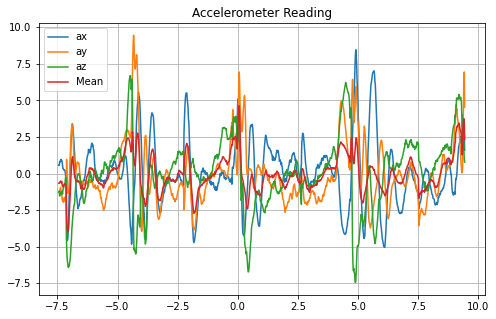

In [29]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(np.min(ac), np.max(ac), 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_accel, ac[:,0], label='ax')
plt.plot(xaxis_accel, ac[:,1], label='ay')
plt.plot(xaxis_accel, ac[:,2], label='az')
plt.plot(xaxis_accel, accel_mean_cal, label='Mean')
plt.legend()
plt.title("Accelerometer Reading")
plt.grid()

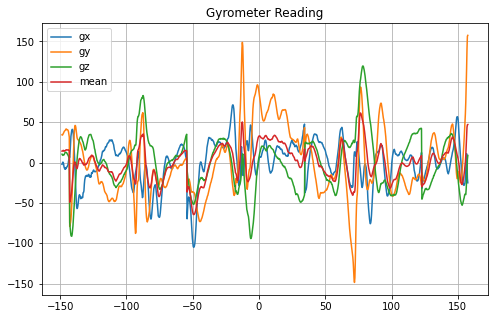

In [30]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(np.min(gy), np.max(gy), 1000)
plt.figure(figsize=(8, 5))
plt.plot(xaxis_gyro, gy[:,0], label='gx')
plt.plot(xaxis_gyro, gy[:,1], label='gy')
plt.plot(xaxis_gyro, gy[:,2], label='gz')
plt.plot(xaxis_gyro, gyro_mean_cal, label='mean')
plt.legend()
plt.title("Gyrometer Reading")
plt.grid()

### Conclusion:
Now as all three dimensional values have now overlapped around 0 axis of time frame, meaning the data is now calibrated and ready to use. From the graph it is clear that standard deviation of all three plots have now been reduced as they are now more closer to their mean curve(red line).

# Kalman Filter Implementation:
A Kalman filter is an optimal estimator-i.e infers parameters of interest from indirect, inaccurate and uncertain observations. It is recursive so that new measurements can be processed as they arrive.

For the purpose of this project, I am using mean data from accelerometer and gyroscope (averaging reduces the noise in the raw signal) to apply Kalman Filter to estimate new state of system.

### Kalman Filter Model:
The Kalman Filter model consists of two parts:
1. Prediction Phase
2. Update Phase

#### Prediction Phase:
The Prediction phase includes:
1. Predict where we are gonna be:
                      X_predict = A * X_prev + B * u_input
2. Covariance Prediction:
                      P_predict = A * P_prev * (A.T) + Q
                      

#### Update Phase:
The Update phase Includes:
1. Computing Error (Prediction against Reality):
                      yt = Sensor_data - (H * X_predict)
2. Comparing Truth with Prediction:
                      S = H * P_predict * (H.T) + R
3. Kalman Gain:
                      K_Gain = P_predict * (H.T) / S
4. State Update:
                      X_new = X_predict + (K_Gain * yt)
5. Covariance Update:
                      P_new = (I - K * H) * P_predict
                      
Here,

A = State Transition Matrix

B = Control Matrix

H = Observation/ Measurement Matrix

X_predict = Predicted State of System given previous state conditions

P_predict = Predicted Covariance of System given previous state conditions

X_prev = Previous State of system (First Time Initialized)

P_prev = Previous Covariance of system (First Time Initialized)

K_Gain = Kalman Gain

X_new = New updated state of system

P_new = New updated covariance of system

Q = Estimated Process Error 

R = Estimated Measurement Error

yt and S are intermediate Variables

### Initializing Variables
First Initializing Variables and using mean data of sensors to check how well filter behaves.

In [31]:
# Variables (Not writing in matrix format since only one value)
A = np.array([ [1] ]) # State Transition Matrix
B = np.array([ [0] ]) # Control Matrix
H = np.array([ [1] ]) # Observation/ Measurement Matrix
I2 = np.identity(1).astype(int) # Identity Matrix
u_input = np.array([ [0] ]) # Initial Input
Q = 0.001 # Estimated Process Covariance
R = 10 # Estimated Measurement Covariance
x_prev = np.array([ [0] ])
p_prev = np.array([ [1] ])
N = 1000 # time Index

print(f"State Transition Matrix: {A}")
print(f"Control Matrix: {B}")
print(f"Measurement Matrix: {H}")

State Transition Matrix: [[1]]
Control Matrix: [[0]]
Measurement Matrix: [[1]]


In [32]:
# Sensor Data storage variables
accel_mean_data = accel_mean_cal # Accelerometer Data
print(f"Shape of Mean Accelerometer Data: {accel_mean_data.shape}")
accel_x = ac[:,0] # x-axis Calibrated Accelerometer Readings
accel_y = ac[:,1] # y-axis Calibrated Acceleromter Readings
accel_z = ac[:,2] # z-axis Calibrated Accelerometer Readings
gyro_mean_data = gyro_mean_cal # Gyroscope Data
print(f"Shape of Mean Gyrosope Data: {gyro_mean_data.shape}")
gyro_x = gy[:,0] # x-axis Calibrated Gyroscope Readings
gyro_y = gy[:,1] # y-axis Calibrated Gyroscope Readings
gyro_z = gy[:,2] # z-axis Calibrated Gyroscope Readings

Shape of Mean Accelerometer Data: (1000,)
Shape of Mean Gyrosope Data: (1000,)


### 1. Standard Kalman Filter Function
Defining a function for Standard kalman filter for single axis.

In [33]:
def Kalman_Filter(Data,State_trans_matrix,Control_matrix,Obs_matrix,Id_matrix,Process_cov,Measure_cov,x_init,p_init,u_init,time_idx):
    x_previous = x_init
    p_previous = p_init
    Kalman_filter_data = []
    Kalman_gain_history= []
    Error_history = []
    for i in range(time_idx):
        # Prediction
        x_predict = (State_trans_matrix * x_previous) + (Control_matrix * u_init)
        p_predict = (State_trans_matrix * p_previous) * State_trans_matrix.T + Process_cov
        # Update
        yt = Data[i] - (Obs_matrix * x_predict)
        S = Obs_matrix * p_predict * (Obs_matrix.T) + Measure_cov
        K_Gain = p_predict * (Obs_matrix.T) / S
        x_new = x_predict + (K_Gain * yt)
        p_new = (Id_matrix - K_Gain * Obs_matrix) * p_predict
        # Variable update
        x_previous = x_new
        p_previous = p_new
        # Keeping history
        Kalman_filter_data.append(x_new)
        Kalman_gain_history.append(K_Gain)
        Error_history.append(p_new)
    
    Kalman_data = np.array(Kalman_filter_data)
    Gain_history = np.array(Kalman_gain_history)
    Error_hist = np.array(Error_history)
    
    return Kalman_data, Gain_history, Error_hist

In [34]:
# First Applying Kalman filter on Accelerometer Data
accel_filter, accel_gain, accel_err = Kalman_Filter(accel_mean_data, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
ax_filter, _, _ = Kalman_Filter(accel_x, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
ay_filter, _, _ = Kalman_Filter(accel_y, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
az_filter, _, _ = Kalman_Filter(accel_z, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
accel_filtered_data = accel_filter.reshape(1000,)
ax_filtered_data = ax_filter.reshape(1000,)
ay_filtered_data = ay_filter.reshape(1000,)
az_filtered_data = az_filter.reshape(1000,)
# accel_gains_history = accel_gain.reshape(1000,)
# accel_error_history = accel_err.reshape(1000,)
print(f"Number of Filtered Accelerometer Readings: {accel_filtered_data.shape}")



# Now Applying Kalman Filter on Gyroscope Data
gyro_filter, gyro_gain, gyro_err = Kalman_Filter(gyro_mean_data, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
gx_filter, _, _ = Kalman_Filter(gyro_x, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
gy_filter, _, _ = Kalman_Filter(gyro_y, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
gz_filter, _, _ = Kalman_Filter(gyro_z, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
gyro_filtered_data = gyro_filter.reshape(1000,)
gx_filtered_data = gx_filter.reshape(1000,)
gy_filtered_data = gy_filter.reshape(1000,)
gz_filtered_data = gz_filter.reshape(1000,)
# gyro_gains_history = gyro_gain.reshape(1000,)
# gyro_error_history = gyro_err.reshape(1000,)
print(f"Number of Filtered Gyroscope Readings: {gyro_filtered_data.shape}")

Number of Filtered Accelerometer Readings: (1000,)
Number of Filtered Gyroscope Readings: (1000,)


### Plotting the True and Estimated Values

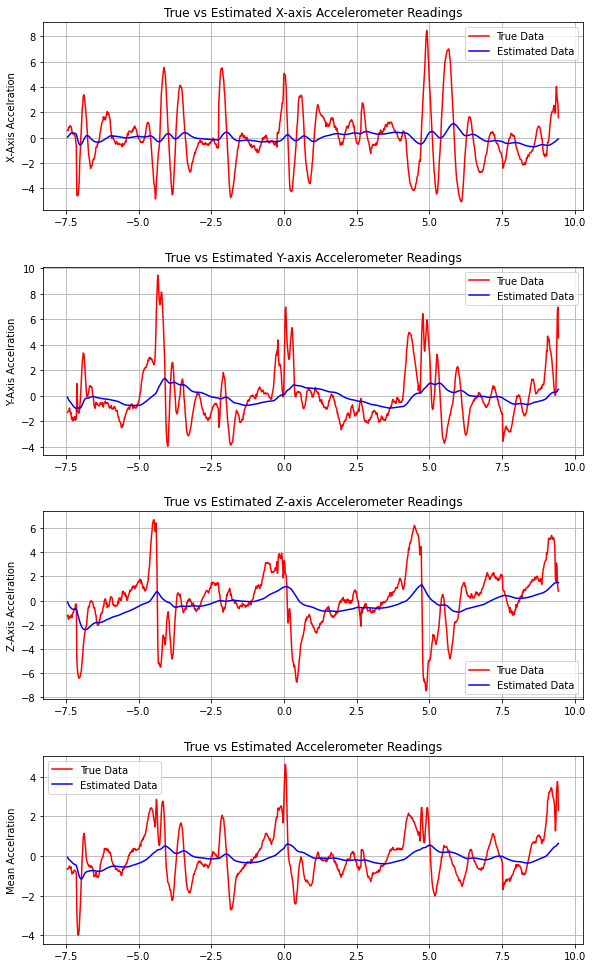

In [35]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(np.min(ac), np.max(ac), 1000)
plt.figure(figsize=(10,16))
# SUBPLOTS

# x-axis
plt.subplot(4,1,1)
plt.plot(xaxis_accel, accel_x, color='red', label='True Data')
plt.plot(xaxis_accel, ax_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated X-axis Accelerometer Readings")
plt.ylabel("X-Axis Accelration")
plt.grid()

# y-axis
plt.subplot(4,1,2)
plt.plot(xaxis_accel, accel_y, color='red', label='True Data')
plt.plot(xaxis_accel, ay_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Y-axis Accelerometer Readings")
plt.ylabel("Y-Axis Accelration")
plt.grid()

# z-axis
plt.subplot(4,1,3)
plt.plot(xaxis_accel, accel_z, color='red', label='True Data')
plt.plot(xaxis_accel, az_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Z-axis Accelerometer Readings")
plt.ylabel("Z-Axis Accelration")
plt.grid()

# Mean Plot
plt.subplot(4,1,4)
plt.plot(xaxis_accel, accel_mean_cal, color='red', label='True Data')
plt.plot(xaxis_accel, accel_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Accelerometer Readings")
plt.ylabel("Mean Accelration")
plt.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.85,
                    top=0.95,
                    wspace=0.9,
                    hspace=0.3)

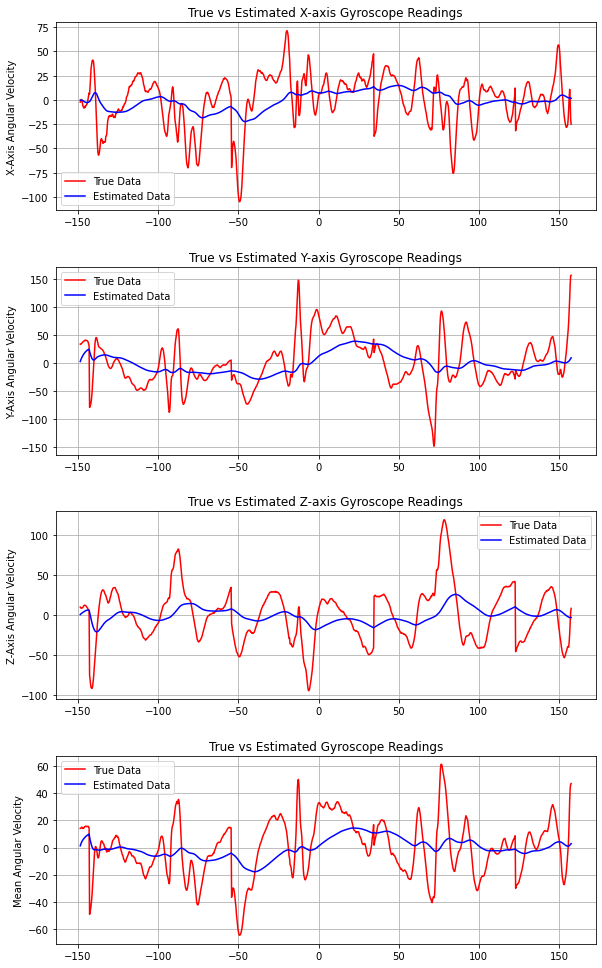

In [36]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(np.min(gy), np.max(gy), 1000)
plt.figure(figsize=(10,16))
# SUBPLOTS

# x-axis
plt.subplot(4,1,1)
plt.plot(xaxis_gyro, gyro_x, color='red', label='True Data')
plt.plot(xaxis_gyro, gx_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated X-axis Gyroscope Readings")
plt.ylabel("X-Axis Angular Velocity")
plt.grid()

# y-axis
plt.subplot(4,1,2)
plt.plot(xaxis_gyro, gyro_y, color='red', label='True Data')
plt.plot(xaxis_gyro, gy_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Y-axis Gyroscope Readings")
plt.ylabel("Y-Axis Angular Velocity")
plt.grid()

# z-axis
plt.subplot(4,1,3)
plt.plot(xaxis_gyro, gyro_z, color='red', label='True Data')
plt.plot(xaxis_gyro, gz_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Z-axis Gyroscope Readings")
plt.ylabel("Z-Axis Angular Velocity")
plt.grid()

# Mean Plot
plt.subplot(4,1,4)
plt.plot(xaxis_gyro, gyro_mean_cal, color='red', label='True Data')
plt.plot(xaxis_gyro, gyro_filtered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Gyroscope Readings")
plt.ylabel("Mean Angular Velocity")
plt.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.85,
                    top=0.95,
                    wspace=0.9,
                    hspace=0.3)

In [37]:
# Mean Values of Accelration and Angular Velocity after Kalman Filtered Data

# ACCELEROMETER
accelration_x = np.mean(ax_filtered_data)
accelration_y = np.mean(ay_filtered_data)
accelration_z = np.mean(az_filtered_data)
print(f"Mean Accelration along x-axis after Kalman Filter: {accelration_x:.3f} m/s^2")
print(f"Mean Accelration along y-axis after Kalman Filter: {accelration_y:.3f} m/s^2")
print(f"Mean Accelration along z-axis after Kalman Filter: {accelration_z:.3f} m/s^2 \n")

# GYROSCOPE
angular_vel_x = np.mean(gx_filtered_data)
angular_vel_y = np.mean(gy_filtered_data)
angular_vel_z = np.mean(gz_filtered_data)
print(f"Mean Accelration along x-axis after Kalman Filter: {angular_vel_x:.3f} rad/s")
print(f"Mean Accelration along y-axis after Kalman Filter: {angular_vel_y:.3f} rad/s")
print(f"Mean Accelration along z-axis after Kalman Filter: {angular_vel_z:.3f} rad/s")

Mean Accelration along x-axis after Kalman Filter: 0.009 m/s^2
Mean Accelration along y-axis after Kalman Filter: -0.086 m/s^2
Mean Accelration along z-axis after Kalman Filter: -0.264 m/s^2 

Mean Accelration along x-axis after Kalman Filter: -0.561 rad/s
Mean Accelration along y-axis after Kalman Filter: -0.273 rad/s
Mean Accelration along z-axis after Kalman Filter: 0.015 rad/s


In [38]:
# Error Computation

# ACCELEROMETER
error_ac_x = ax_mean - accelration_x
error_ac_y = ay_mean - accelration_y
error_ac_z = az_mean - accelration_z
print(f"Accelration error along x-axis: {error_ac_x:.3f} m/s^2")
print(f"Accelration error along y-axis: {error_ac_y:.3f} m/s^2")
print(f"Accelration error along z-axis: {error_ac_z:.3f} m/s^2 \n")

# GYROSCOPE
error_gy_x = gx_mean - angular_vel_x
error_gy_y = gy_mean - angular_vel_y
error_gy_z = gz_mean - angular_vel_z
print(f"Gyroscope error along x-axis: {error_gy_x:.3f} rad/s")
print(f"Gyroscope error along y-axis: {error_gy_y:.3f} rad/s")
print(f"Gyroscope error along z-axis: {error_gy_z:.3f} rad/s")

Accelration error along x-axis: -0.009 m/s^2
Accelration error along y-axis: 0.086 m/s^2
Accelration error along z-axis: 0.264 m/s^2 

Gyroscope error along x-axis: 0.561 rad/s
Gyroscope error along y-axis: 0.273 rad/s
Gyroscope error along z-axis: -0.015 rad/s


### Position and Angular Position of System
Now we want to determine the position of our system and then apply Kalman filter to our position curve. First we will define our time frame and assume that all 1000 readings were acquired at 1 second and hence in 1000 seconds we have 1000 readings. This gives us delta time (dt) = 1. Also I will take mean mean accelration curve to comput velocity and accelration.

In [70]:
# First we need to develop a time frame for velocity and position curves
time = np.arange(accel_mean_cal.shape[0])
accel_data = accel_mean_cal
gyro_data = gyro_mean_cal
v_init = 0
pos_init = 0
ang_pos_init = 0
velocity = []
position = []
ang_position = []
for i in range(accel_data.shape[0]-1):
    dt = time[i+1]-time[i]
    vel = v_init + ((accel_data[i] + accel_data[i+1]) / 2) * dt
    pos = pos_init + ((v_init + vel) / 2) * dt
    ang_pos = ang_pos_init + ((gyro_data[i] + gyro_data[i+1]) / 2) * dt
    velocity.append(vel)
    position.append(pos)
    ang_position.append(ang_pos)
    v_init = vel
    pos_init = pos
    ang_pos_init = ang_pos
    
velocity.insert(0,0)
position.insert(0,0)
ang_position.insert(0,0)

velocity_curve = np.array(velocity)
position_curve = np.array(position)
angular_position_curve = np.array(ang_position)

print(time.shape)
print(accel_data.shape)
print(gyro_data.shape)
print(velocity_curve.shape)
print(position_curve.shape)
print(angular_position_curve.shape)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


In [72]:
# Lets apply Kalman filter on the data
pos_filter, _, _= Kalman_Filter(position_curve, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
ang_pos_filter, _, _ = Kalman_Filter(angular_position_curve, A, B, H, I2, Q, R, x_prev, p_prev, u_input, N)
pos_filtered_data = pos_filter.reshape(1000,)
pos_predicted_data = position_curve.reshape(1000,)
ang_pos_filtered_data = ang_pos_filter.reshape(1000,)
ang_pos_predicted_data = angular_position_curve.reshape(1000,)
time_scale = time.reshape(1000,)

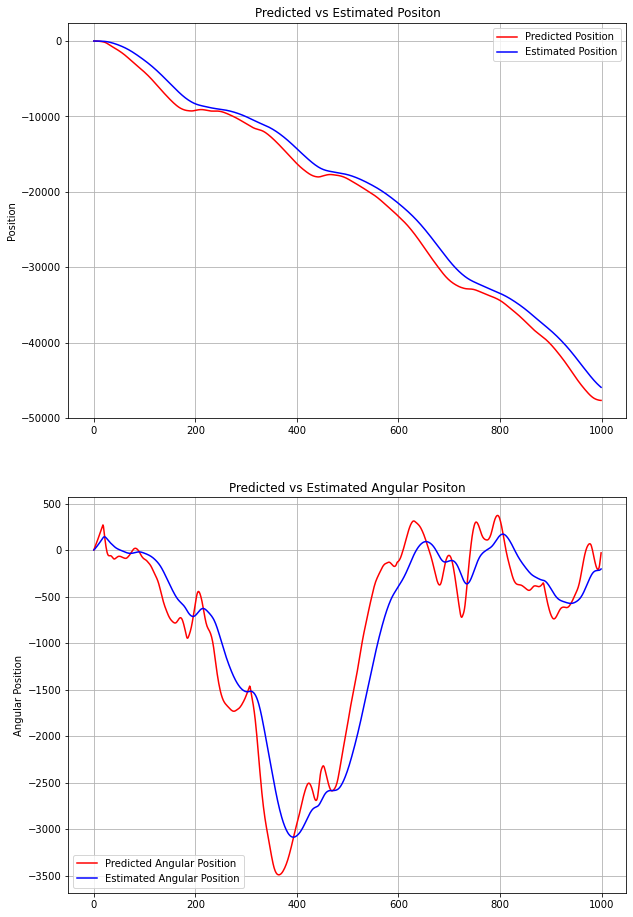

In [73]:
# DATA VISUALIZATION FOR POSITION
plt.figure(figsize=(10,16))
# SUBPLOTS

# Position
plt.subplot(2,1,1)
plt.plot(time_scale, pos_predicted_data, color='red', label='Predicted Position')
plt.plot(time_scale, pos_filtered_data, color='blue', label='Estimated Position')
plt.legend()
plt.title("Predicted vs Estimated Positon")
plt.ylabel("Position")
plt.grid()

# Angular Position
plt.subplot(2,1,2)
plt.plot(time_scale, ang_pos_predicted_data, color='red', label='Predicted Angular Position')
plt.plot(time_scale, ang_pos_filtered_data, color='blue', label='Estimated Angular Position')
plt.legend()
plt.title("Predicted vs Estimated Angular Positon")
plt.ylabel("Angular Position")
plt.grid()

### 2. Extended Kalman Filter
Extended Kalman Filter is an algorithm that is applicable on non-linear systems. Since practically there are no linear systems that exist in real world and Kalman Filter is applicable for linear system, hence Extended Kalman Filter is used in real world applications to monitor the raw signal and filter it to minimize noises and give most accurate measurements of the system.

1. Kalman Filter (KF) -> Works for Linear State Space Model
2. Extended Kalman Filter (EKF) -> Works for Non Linear State Space Model

### Extended Kalman Filter Model:
The Extended Kalman Filter works in the same way as Kalman Filter. It has same Prediction and Update steps. However the change occurs in our state space model that we use for our system. In its state space model some non-linearity exists.

1. Initialization: In this step we initialize our system's previous state. For the purpose of this project lets assume:
                                            x_k-1|k-1 = [0 0 0].T
                                                u_k-1 = [0 0].T
2. Predicted State Estimate: 
                                            x_k|k-1 = f(x_k-1|x_k-1, u_k)
                                      x_k|k-1 = A * x_k-1 + B * u_k-1 + v_k-1
3. Predicted Co-variance of State Estimate:
                                       P_k|k-1 = F_k * P_k-1|k-1 * (F_k).T + Q_k
4. Innovation or Measurement Model:
                                            y_k = z_k - h(x_k|k-1)
                                              z_k = Sensor Data
                                        h(x_k|k-1) = H_k * x_k|k-1 + w_k
5. Innovation Covariance:
                                          S_k = H_k * P_k|k-1 * (H_k).T + R_k
6. Kalman Gain:
                                             K_k = P_k|k-1 * (H_k).T / S_k
7. Updated State:
                                           x_k|k = x_k|k-1 + (K_k) * (y_k)
8. Updated Covariance:
                                           P_k|k = (I - K_k * H_k) * P_k|k-1
                                           
The above steps mentioned are same as of Kalman Filter with change in notations. Actually these notations are most widely used everywhere hence used these. 

Lets make some Initializations for our system.

#### Note: 
Control Matrix and Initial Input can be changed since they account for non-linearity in the system.

In [39]:
# Initializing State Variables/Matrices
A_ST = np.array([ [1] ]) # State Transition Matrix
B_CT = np.array([ [0.2] ]) # Control Matrix
H_OB = np.array([ [1] ]) # Observation/ Measurement Matrix
I2 = np.identity(1).astype(int) # Identity Matrix
u_input = np.array([ [-0.1] ]) # Initial Input
Q = 0.001 # Estimated Process Covariance
R = 1000 * Q # Estimated Measurement Covariance
x_prev = np.array([ [0] ])
p_prev = np.array([ [1] ])
N = 1000 # time Index

print(f"State Transition Matrix: {A_ST}")
print(f"Control Matrix: {B_CT}")
print(f"Measurement Matrix: {H_OB}")

State Transition Matrix: [[1]]
Control Matrix: [[0.2]]
Measurement Matrix: [[1]]


In [40]:
# Defining Extended Kalman Filter for Single Axis
def Extended_Kalman_Filter(Data,State_trans_matrix,Control_matrix,Obs_matrix,Id_matrix,Process_cov,Measure_cov,x_init,p_init,u_init,time_idx):
    x_previous = x_init
    p_previous = p_init
    Kalman_filter_data = []
    Kalman_gain_history= []
    Error_history = []
    for i in range(time_idx):
        # Prediction
        x_predict = (State_trans_matrix * x_previous) + (Control_matrix * u_init)
        p_predict = (State_trans_matrix * p_previous) * State_trans_matrix.T + Process_cov
        # Update
        yt = Data[i] - (Obs_matrix * x_predict)
        S = Obs_matrix * p_predict * (Obs_matrix.T) + Measure_cov
        K_Gain = p_predict * (Obs_matrix.T) / S
        x_new = x_predict + (K_Gain * yt)
        p_new = (Id_matrix - K_Gain * Obs_matrix) * p_predict
        # Variable update
        x_previous = x_new
        p_previous = p_new
        # Keeping history
        Kalman_filter_data.append(x_new)
        Kalman_gain_history.append(K_Gain)
        Error_history.append(p_new)
    
    Kalman_data = np.array(Kalman_filter_data)
    Gain_history = np.array(Kalman_gain_history)
    Error_hist = np.array(Error_history)
    
    return Kalman_data, Gain_history, Error_hist

In [41]:
# First Applying Extended Kalman filter on Accelerometer Data
accel_kfilter, _, _ = Extended_Kalman_Filter(accel_mean_data, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
ax_kfilter, _, _ = Extended_Kalman_Filter(accel_x, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
ay_kfilter, _, _ = Extended_Kalman_Filter(accel_y, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
az_kfilter, _, _ = Extended_Kalman_Filter(accel_z, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
accel_kfiltered_data = accel_kfilter.reshape(1000,)
ax_kfiltered_data = ax_kfilter.reshape(1000,)
ay_kfiltered_data = ay_kfilter.reshape(1000,)
az_kfiltered_data = az_kfilter.reshape(1000,)

print(f"Number of Filtered Accelerometer Readings: {accel_kfiltered_data.shape}")



# Now Applying Extended Kalman Filter on Gyroscope Data
gyro_kfilter, _, _ = Extended_Kalman_Filter(gyro_mean_data, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
gx_kfilter, _, _ = Extended_Kalman_Filter(gyro_x, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
gy_kfilter, _, _ = Extended_Kalman_Filter(gyro_y, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
gz_kfilter, _, _ = Extended_Kalman_Filter(gyro_z, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
gyro_kfiltered_data = gyro_kfilter.reshape(1000,)
gx_kfiltered_data = gx_kfilter.reshape(1000,)
gy_kfiltered_data = gy_kfilter.reshape(1000,)
gz_kfiltered_data = gz_kfilter.reshape(1000,)

print(f"Number of Filtered Gyroscope Readings: {gyro_kfiltered_data.shape}")

Number of Filtered Accelerometer Readings: (1000,)
Number of Filtered Gyroscope Readings: (1000,)


### Plotting True and Estimated Values

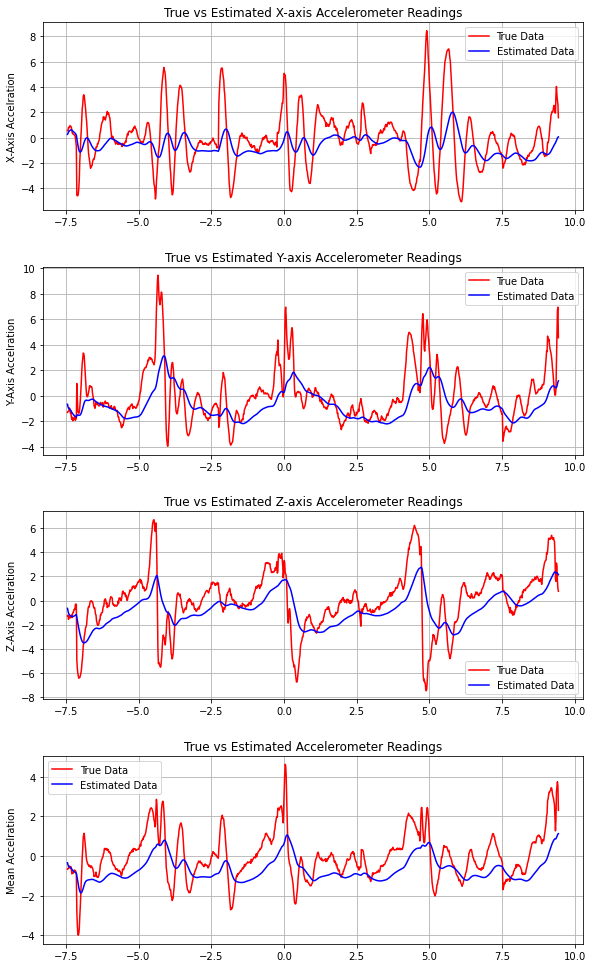

In [42]:
# DATA VISUALIZATION FOR ACCELEROMETER
xaxis_accel = np.linspace(np.min(ac), np.max(ac), 1000)
plt.figure(figsize=(10,16))
# SUBPLOTS

# x-axis
plt.subplot(4,1,1)
plt.plot(xaxis_accel, accel_x, color='red', label='True Data')
plt.plot(xaxis_accel, ax_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated X-axis Accelerometer Readings")
plt.ylabel("X-Axis Accelration")
plt.grid()

# y-axis
plt.subplot(4,1,2)
plt.plot(xaxis_accel, accel_y, color='red', label='True Data')
plt.plot(xaxis_accel, ay_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Y-axis Accelerometer Readings")
plt.ylabel("Y-Axis Accelration")
plt.grid()

# z-axis
plt.subplot(4,1,3)
plt.plot(xaxis_accel, accel_z, color='red', label='True Data')
plt.plot(xaxis_accel, az_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Z-axis Accelerometer Readings")
plt.ylabel("Z-Axis Accelration")
plt.grid()

# Mean Plot
plt.subplot(4,1,4)
plt.plot(xaxis_accel, accel_mean_cal, color='red', label='True Data')
plt.plot(xaxis_accel, accel_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Accelerometer Readings")
plt.ylabel("Mean Accelration")
plt.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.85,
                    top=0.95,
                    wspace=0.9,
                    hspace=0.3)

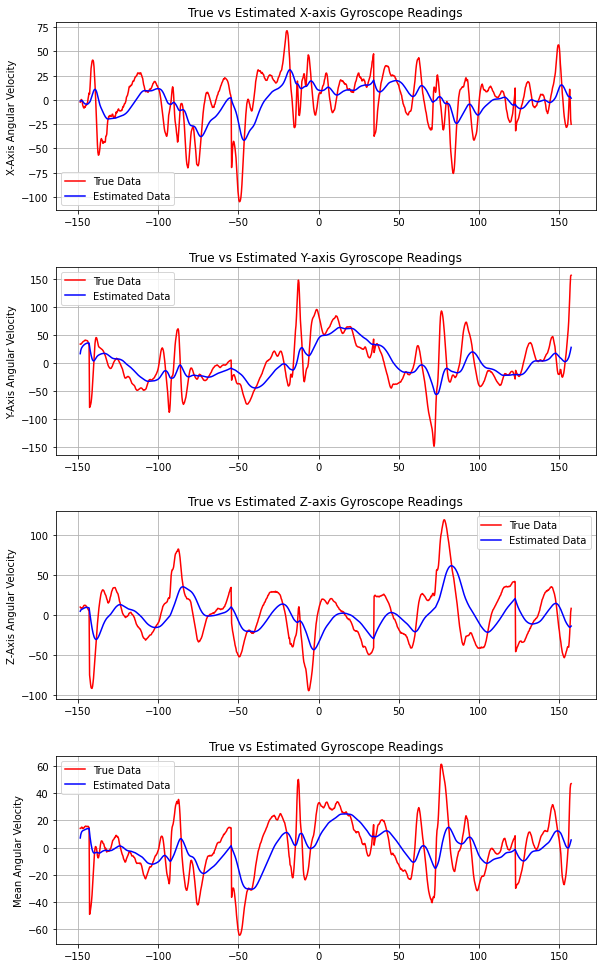

In [43]:
# DATA VISUALIZATION FOR GYROSCOPE
xaxis_gyro = np.linspace(np.min(gy), np.max(gy), 1000)
plt.figure(figsize=(10,16))
# SUBPLOTS

# x-axis
plt.subplot(4,1,1)
plt.plot(xaxis_gyro, gyro_x, color='red', label='True Data')
plt.plot(xaxis_gyro, gx_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated X-axis Gyroscope Readings")
plt.ylabel("X-Axis Angular Velocity")
plt.grid()

# y-axis
plt.subplot(4,1,2)
plt.plot(xaxis_gyro, gyro_y, color='red', label='True Data')
plt.plot(xaxis_gyro, gy_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Y-axis Gyroscope Readings")
plt.ylabel("Y-Axis Angular Velocity")
plt.grid()

# z-axis
plt.subplot(4,1,3)
plt.plot(xaxis_gyro, gyro_z, color='red', label='True Data')
plt.plot(xaxis_gyro, gz_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Z-axis Gyroscope Readings")
plt.ylabel("Z-Axis Angular Velocity")
plt.grid()

# Mean Plot
plt.subplot(4,1,4)
plt.plot(xaxis_gyro, gyro_mean_cal, color='red', label='True Data')
plt.plot(xaxis_gyro, gyro_kfiltered_data, color='blue', label='Estimated Data')
plt.legend()
plt.title("True vs Estimated Gyroscope Readings")
plt.ylabel("Mean Angular Velocity")
plt.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.85,
                    top=0.95,
                    wspace=0.9,
                    hspace=0.3)

In [44]:
# Mean Values of Accelration and Angular Velocity after Kalman Filtered Data

# ACCELEROMETER
accelration_x = np.mean(ax_kfiltered_data)
accelration_y = np.mean(ay_kfiltered_data)
accelration_z = np.mean(az_kfiltered_data)
print(f"Mean Accelration along x-axis after Kalman Filter: {accelration_x:.3f} m/s^2")
print(f"Mean Accelration along y-axis after Kalman Filter: {accelration_y:.3f} m/s^2")
print(f"Mean Accelration along z-axis after Kalman Filter: {accelration_z:.3f} m/s^2 \n")

# GYROSCOPE
angular_vel_x = np.mean(gx_kfiltered_data)
angular_vel_y = np.mean(gy_kfiltered_data)
angular_vel_z = np.mean(gz_kfiltered_data)
print(f"Mean Accelration along x-axis after Kalman Filter: {angular_vel_x:.3f} rad/s")
print(f"Mean Accelration along y-axis after Kalman Filter: {angular_vel_y:.3f} rad/s")
print(f"Mean Accelration along z-axis after Kalman Filter: {angular_vel_z:.3f} rad/s")

Mean Accelration along x-axis after Kalman Filter: -0.612 m/s^2
Mean Accelration along y-axis after Kalman Filter: -0.679 m/s^2
Mean Accelration along z-axis after Kalman Filter: -0.732 m/s^2 

Mean Accelration along x-axis after Kalman Filter: -0.729 rad/s
Mean Accelration along y-axis after Kalman Filter: -0.802 rad/s
Mean Accelration along z-axis after Kalman Filter: -0.247 rad/s


In [45]:
# Error Computation

# ACCELEROMETER
error_ac_x = ax_mean - accelration_x
error_ac_y = ay_mean - accelration_y
error_ac_z = az_mean - accelration_z
print(f"Accelration error along x-axis: {error_ac_x:.3f} m/s^2")
print(f"Accelration error along y-axis: {error_ac_y:.3f} m/s^2")
print(f"Accelration error along z-axis: {error_ac_z:.3f} m/s^2 \n")

# GYROSCOPE
error_gy_x = gx_mean - angular_vel_x
error_gy_y = gy_mean - angular_vel_y
error_gy_z = gz_mean - angular_vel_z
print(f"Gyroscope error along x-axis: {error_gy_x:.3f} rad/s")
print(f"Gyroscope error along y-axis: {error_gy_y:.3f} rad/s")
print(f"Gyroscope error along z-axis: {error_gy_z:.3f} rad/s \n")

Accelration error along x-axis: 0.612 m/s^2
Accelration error along y-axis: 0.679 m/s^2
Accelration error along z-axis: 0.732 m/s^2 

Gyroscope error along x-axis: 0.729 rad/s
Gyroscope error along y-axis: 0.802 rad/s
Gyroscope error along z-axis: 0.247 rad/s 



### Position and Angular Position of System
Now we want to determine the position of our system and then apply Extended Kalman filter to our position curve. First we will define our time frame and assume that all 1000 readings were acquired at 1 second and hence in 1000 seconds we have 1000 readings. This gives us delta time (dt) = 1. Also I will take mean mean accelration curve to comput velocity and accelration.

In [74]:
# First we need to develop a time frame for velocity and position curves
time = np.arange(accel_mean_cal.shape[0])
accel_data = accel_mean_cal
gyro_data = gyro_mean_cal
v_init = 0
pos_init = 0
ang_pos_init = 0
velocity = []
position = []
ang_position = []
for i in range(accel_data.shape[0]-1):
    dt = time[i+1]-time[i]
    vel = v_init + ((accel_data[i] + accel_data[i+1]) / 2) * dt
    pos = pos_init + ((v_init + vel) / 2) * dt
    ang_pos = ang_pos_init + ((gyro_data[i] + gyro_data[i+1]) / 2) * dt
    velocity.append(vel)
    position.append(pos)
    ang_position.append(ang_pos)
    v_init = vel
    pos_init = pos
    ang_pos_init = ang_pos
    
velocity.insert(0,0)
position.insert(0,0)
ang_position.insert(0,0)

velocity_curve = np.array(velocity)
position_curve = np.array(position)
angular_position_curve = np.array(ang_position)

In [77]:
# Lets apply Extended Kalman filter on the data
pos_kfilter, _, _= Extended_Kalman_Filter(position_curve, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
ang_pos_kfilter, _, _ = Extended_Kalman_Filter(angular_position_curve, A_ST, B_CT, H_OB, I2, Q, R, x_prev, p_prev, u_input, N)
pos_kfiltered_data = pos_kfilter.reshape(1000,)
pos_kpredicted_data = position_curve.reshape(1000,)
ang_pos_kfiltered_data = ang_pos_kfilter.reshape(1000,)
ang_pos_kpredicted_data = angular_position_curve.reshape(1000,)
time_scale = time.reshape(1000,)

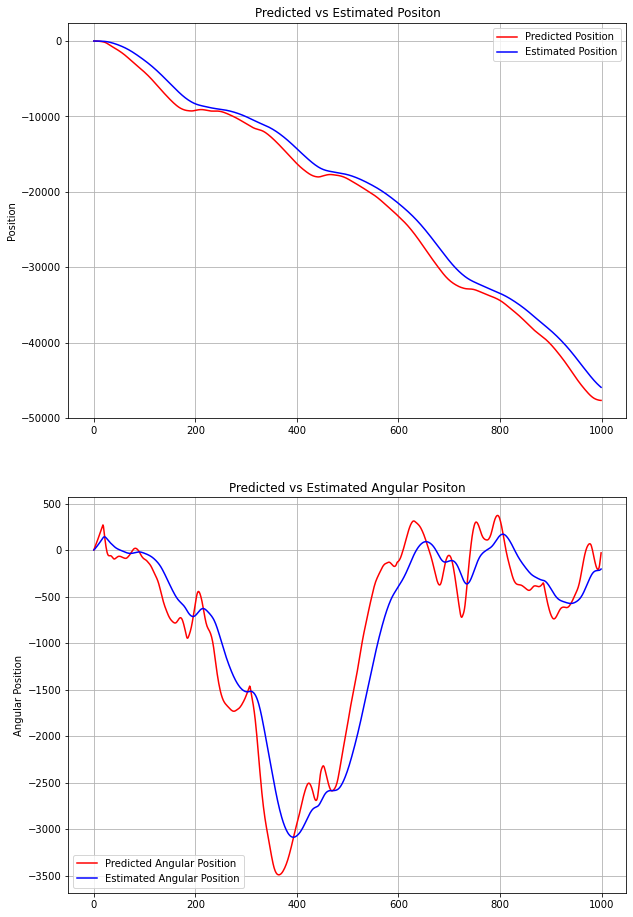

In [78]:
# DATA VISUALIZATION FOR POSITION
plt.figure(figsize=(10,16))
# SUBPLOTS

# Position
plt.subplot(2,1,1)
plt.plot(time_scale, pos_kpredicted_data, color='red', label='Predicted Position')
plt.plot(time_scale, pos_kfiltered_data, color='blue', label='Estimated Position')
plt.legend()
plt.title("Predicted vs Estimated Positon")
plt.ylabel("Position")
plt.grid()

# Angular Position
plt.subplot(2,1,2)
plt.plot(time_scale, ang_pos_kpredicted_data, color='red', label='Predicted Angular Position')
plt.plot(time_scale, ang_pos_kfiltered_data, color='blue', label='Estimated Angular Position')
plt.legend()
plt.title("Predicted vs Estimated Angular Positon")
plt.ylabel("Angular Position")
plt.grid()

### Conclusion:
From above graphs it is very much clear that after applying Kalman Filter the output of the sensors signal is very much refined and now it is giving true values of our system. 

By varying R and Q of our system we can reduce noises from signal and make our system much more efficient. The damping value of the filter depends on the constants difference.

If R and Q has big ratio difference like 1000, 10000, and so on, the damping will get bigger and can reduce the original data. Meanwhile, if the ratio difference of R and Q has smaller difference like 10, 1, 0,1 and so on, the damping will get smaller till it does not have any damping effect. The recommended ratio difference of R and Q values is 100.

### 3. Complimentary Filter
A complimentary filter is a good and effective method for blending measurements from an accelerometer and gyroscope to generate an estimate for orientation.

The complimentary filter is the simplest one and effective (in lesser extent to Kalman and Extended Kalman Filter) in combining the data coming from accelermeter and gyroscope to determine the orientation of our system.

It computes angle from accelerometer and performs numerical integration on gyroscope data. A complimetary filter basically merges both computations results and make them pass through Low Pass Filter and High Pass Filter and then converges to determine orientation of system.

#### Implementation:
The following are the three main equations that govern Complimentary Filter pipeline:

1. Angle from Accelometer Data:
                   Accel_angle = math.atan2(accel_x, math.sqrt((accel_y * accel_y) + (accel_z * accel_z))
2. Angle from Gyroscope Data:
                             Gyro_angle[i] = Gyro_angle[i-1] + Gyro_y * (time[i] - time[i-1])
3. Angle Computed from Complimentary Filter:
                               Theta_cf = alpha_cf * theta_hpf + (1 - alpha_cf) * theta_lpf
                               
Here:

Accel_angle = Angle computed from Accelerometer Data

accel_x = x-axis Accelration value

accel_y = y-axis Accelration value

accel_z = z-axis Accelration value

Gyro_angle = Angle computed from Gyroscope Data

Gyro_angle[i-1] = Initial angle of system

Gyro_y = Angular Velocity computed along y-axis

Theta_cf = Actual angle after Complimemtary Filter

alpha_cf = Complimentary filter Coefficient

theta_hpf = Angle from High Pass Filter

theta_lpf = Angle from Low Pass Filter

In [46]:
# Initialization
Ts = 1/1000 # Data Rate Assumption coming from sensor
init_ang = 0 # Initial input angle
init_ang_hp = 0 # Initial input angle for High pass Filter
fc = 100 # Cut off Frequency
tau = 1 / (2 * math.pi * fc) # Time constant
alpha_hp = tau / tau + 1 # High Pass Filter Coefficient
alpha_lp = Ts / Ts + tau # Low Pass Filter Coefficient

In [47]:
# Angle from Accelration to be fed for gyroscope numeric integration

ang_accel = [] # An empty list to append data
for i in range(accel_x.shape[0]):
    # General Equation
    my_ang = math.atan2(accel_x[i], math.sqrt((accel_y[i]*accel_y[i]) + (accel_z[i] * accel_z[i]))) * 180 / math.pi
    ang_accel.append(my_ang)
# Converting list to array for numpy computations in next cell
accel_angle = np.array(ang_accel)
print(accel_angle.shape) # Printing the shape to cross check size of vetor with size of data

(1000,)


In [48]:
# Complimentary filter

# Initializing initial values

# GYROSCOPE VARIABLES
ang_gyr = np.zeros(accel_x.shape[0]) # A zero array to store gyroscope measured angles
ang_gyr[0] = accel_angle[0] # First element of gyro-zero array = First element of Accelration angle computed above
ang_gyr_hp = np.zeros(accel_x.shape[0]) # A zero array to store high pass filtered angles from gyroscope
ang_gyr_hp[0] = accel_angle[0] # First element of high pass-zero array = First element of Accelration angle computed above

# ACCELEROMETER VARIABLES
angle_accel = np.zeros(accel_x.shape[0]) # A zero array to store accelerometer measured angles
angle_accel[0] = accel_angle[0] # First element of accel-zero array = First element of Accelration angle computed above
ang_accel_lp = np.zeros(accel_x.shape[0]) # A zero array to store low pass filtered angles from accelerometer
ang_accel_lp[0] = accel_angle[0] # First element of low pass-zero array = First element of Accelration angle computed above

# FILTER VARIABLES
ang_of_filter = np.zeros(accel_x.shape[0]) # A zero array to store filtered angles
ang_of_filter[0] = accel_angle[0] # First element of filtered-zero array = First element of Accelration angle computed above


for i in range(1, gyro_x.shape[0]):
    # Compute Accelrometer angle
    angle_accel[i] = math.atan2(accel_x[i], math.sqrt((accel_y[i]*accel_y[i]) + (accel_z[i] * accel_z[i]))) * 180 / math.pi
    # Low Pass Filter for Accelration angle
    ang_accel_lp[i] = alpha_lp*angle_accel[i] + (1-alpha_lp)*ang_accel_lp[i-1]
    # Compute Gyro Angle
    ang_gyr[i] = ang_gyr[i-1] + gyro_y[i]*Ts
    # High pass angle for Gyro Angle
    ang_gyr_hp[i] = (ang_gyr[i-1] + alpha_hp*(ang_gyr[i] - ang_gyr[i-1]))
    
    # Combine to form complimentary filter
    ang_of_filter[i] = ang_gyr_hp[i]*0.4 + 0.6*ang_accel_lp[i]


#### Note!
You can change the values 0.4 and 0.6 in the above equation. It saying that we are 40 % relying on gyroscope angular computations and 60 % on accelerometer angular computations. 

Usually Accelerometer percentage is taken large since it gives accurate results over long term measurements whereas gyroscope measurements drift apart.

### Plotting the Angle Plot:

Far now we have computed the angle from gyroscope and accelerometer and passed them through high pass and low pass filter respectively one by one.
In complimentary filter, we combine both filters angles and then give the near precise result.

So lets see how it looks!

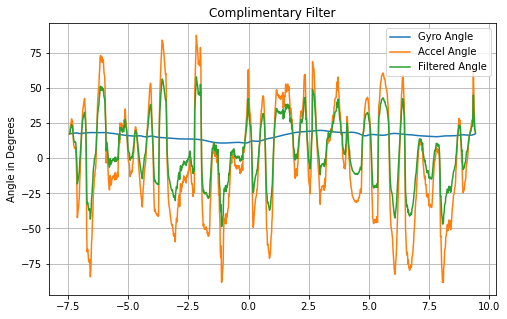

In [49]:
# PLOTTING THE ANGLES
plt.figure(figsize=(8,5))
plt.plot(xaxis_accel, ang_gyr_hp, label="Gyro Angle")
plt.plot(xaxis_accel, ang_accel_lp, label="Accel Angle")
plt.plot(xaxis_accel, ang_of_filter, label="Filtered Angle")
plt.legend()
plt.ylabel("Angle in Degrees")
plt.title("Complimentary Filter")
plt.grid()

In [50]:
# Mean angle calculation 
mean_ang_gyro = np.mean(ang_gyr_hp)
mean_ang_accel = np.mean(ang_accel_lp)
mean_filtered_ang = np.mean(ang_of_filter)

print(f"Mean angle calcultaed by groscope: {mean_ang_gyro:.2f} degrees")
print(f"Mean angle calculated by accelerometer: {mean_ang_accel:.2f} degrees")
print(f"Actual angle after application of complimentary filter: {mean_filtered_ang:.2f} degrees")

Mean angle calcultaed by groscope: 15.82 degrees
Mean angle calculated by accelerometer: -2.17 degrees
Actual angle after application of complimentary filter: 5.03 degrees
